## Agenda

1. Introduction to IMDB use case
2. Merging movies & directors datasets
3. IMDB data exploration (Post-read)
4. apply()
5. groupby()
  - Group based Aggregation
  - Group based Filtering
  - Group based Apply

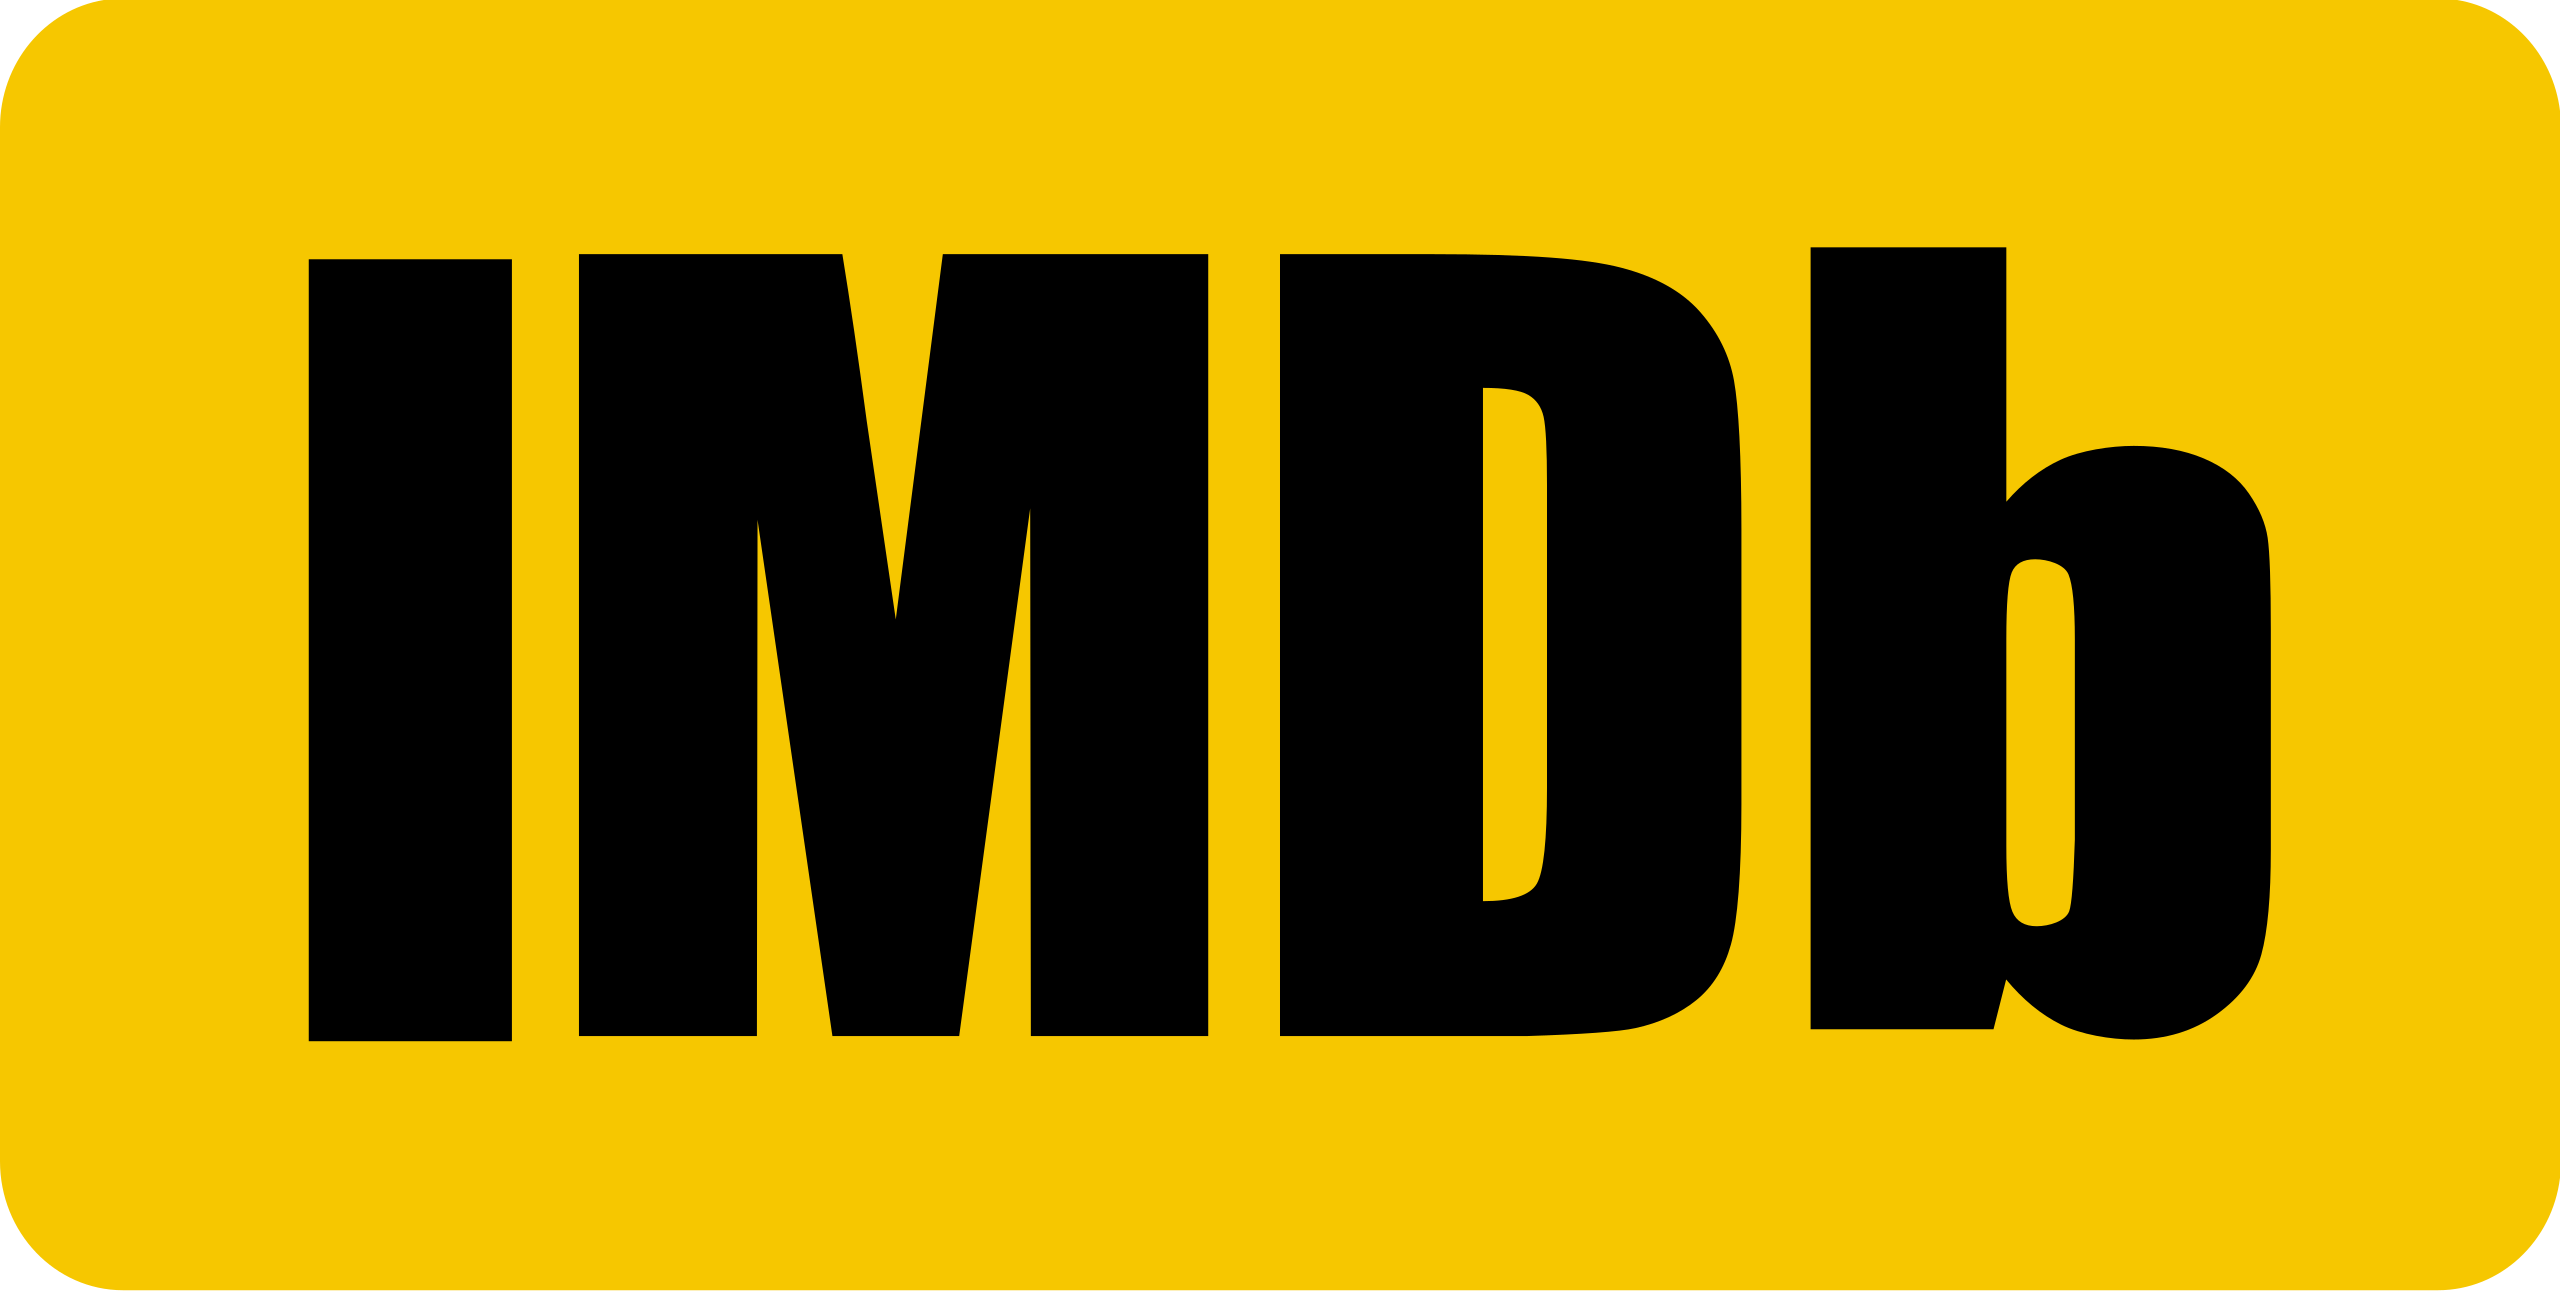

In [ ]:
## Internet Movie Database

In [ ]:
!gdown 1s2TkjSpzNc4SyxqRrQleZyDIHlc7bxnd
!gdown 1Ws-_s1fHZ9nHfGLVUQurbHDvStePlEJm

Downloading...
From: https://drive.google.com/uc?id=1s2TkjSpzNc4SyxqRrQleZyDIHlc7bxnd
To: /content/movies.csv
100% 112k/112k [00:00<00:00, 101MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Ws-_s1fHZ9nHfGLVUQurbHDvStePlEJm
To: /content/directors.csv
100% 65.4k/65.4k [00:00<00:00, 90.5MB/s]


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
movies = pd.read_csv('movies.csv')

In [ ]:
movies.head()

,Unnamed: 0,id,budget,popularity,revenue,title,vote_average,vote_count,director_id,year,month,day
0,0,43597,237000000,150,2787965087,Avatar,7.2,11800,4762,2009,Dec,Thursday
1,1,43598,300000000,139,961000000,Pirates of the Caribbean: At World's End,6.9,4500,4763,2007,May,Saturday
2,2,43599,245000000,107,880674609,Spectre,6.3,4466,4764,2015,Oct,Monday
3,3,43600,250000000,112,1084939099,The Dark Knight Rises,7.6,9106,4765,2012,Jul,Monday
4,5,43602,258000000,115,890871626,Spider-Man 3,5.9,3576,4767,2007,May,Tuesday


In [ ]:
movies.shape

(1465, 12)

In [ ]:
directors = pd.read_csv('directors.csv')
directors.head()

,Unnamed: 0,director_name,id,gender
0,0,James Cameron,4762,Male
1,1,Gore Verbinski,4763,Male
2,2,Sam Mendes,4764,Male
3,3,Christopher Nolan,4765,Male
4,4,Andrew Stanton,4766,Male


In [ ]:
movies.drop(columns = ['Unnamed: 0'], inplace = True)
directors.drop(columns = ['Unnamed: 0'], inplace = True)

In [ ]:
movies.head()

,id,budget,popularity,revenue,title,vote_average,vote_count,director_id,year,month,day
0,43597,237000000,150,2787965087,Avatar,7.2,11800,4762,2009,Dec,Thursday
1,43598,300000000,139,961000000,Pirates of the Caribbean: At World's End,6.9,4500,4763,2007,May,Saturday
2,43599,245000000,107,880674609,Spectre,6.3,4466,4764,2015,Oct,Monday
3,43600,250000000,112,1084939099,The Dark Knight Rises,7.6,9106,4765,2012,Jul,Monday
4,43602,258000000,115,890871626,Spider-Man 3,5.9,3576,4767,2007,May,Tuesday


In [ ]:
directors.shape

(2349, 3)

In [ ]:
directors[directors.duplicated()]

,director_name,id,gender


In [ ]:
directors.duplicated().sum()

0

In [ ]:
directors['director_name'].nunique() == directors.shape[0]

True

In [ ]:
movies['director_id'].nunique()

199

In [ ]:
directors['id'].nunique()

2349

In [ ]:
movies['director_id'].isin(directors['id'])

# in ('a', 'b', 'c') In SQL

0       True
1       True
2       True
3       True
4       True
        ... 
1460    True
1461    True
1462    True
1463    True
1464    True
Name: director_id, Length: 1465, dtype: bool

In [ ]:
np.all(movies['director_id'].isin(directors['id']))

True

In [ ]:
data = movies.merge(directors, how='left', left_on='director_id',right_on='id')
data

,id_x,budget,popularity,revenue,title,vote_average,vote_count,director_id,year,month,day,director_name,id_y,gender
0,43597,237000000,150,2787965087,Avatar,7.2,11800,4762,2009,Dec,Thursday,James Cameron,4762,Male
1,43598,300000000,139,961000000,Pirates of the Caribbean: At World's End,6.9,4500,4763,2007,May,Saturday,Gore Verbinski,4763,Male
2,43599,245000000,107,880674609,Spectre,6.3,4466,4764,2015,Oct,Monday,Sam Mendes,4764,Male
3,43600,250000000,112,1084939099,The Dark Knight Rises,7.6,9106,4765,2012,Jul,Monday,Christopher Nolan,4765,Male
4,43602,258000000,115,890871626,Spider-Man 3,5.9,3576,4767,2007,May,Tuesday,Sam Raimi,4767,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,48363,0,3,321952,The Last Waltz,7.9,64,4809,1978,May,Monday,Martin Scorsese,4809,Male
1461,48370,27000,19,3151130,Clerks,7.4,755,5369,1994,Sep,Tuesday,Kevin Smith,5369,Male
1462,48375,0,7,0,Rampage,6.0,131,5148,2009,Aug,Friday,Uwe Boll,5148,Male
1463,48376,0,3,0,Slacker,6.4,77,5535,1990,Jul,Friday,Richard Linklater,5535,Male


In [ ]:
data.drop(['director_id','id_y'],axis=1,inplace=True)
data.head()

,id_x,budget,popularity,revenue,title,vote_average,vote_count,year,month,day,director_name,gender
0,43597,237000000,150,2787965087,Avatar,7.2,11800,2009,Dec,Thursday,James Cameron,Male
1,43598,300000000,139,961000000,Pirates of the Caribbean: At World's End,6.9,4500,2007,May,Saturday,Gore Verbinski,Male
2,43599,245000000,107,880674609,Spectre,6.3,4466,2015,Oct,Monday,Sam Mendes,Male
3,43600,250000000,112,1084939099,The Dark Knight Rises,7.6,9106,2012,Jul,Monday,Christopher Nolan,Male
4,43602,258000000,115,890871626,Spider-Man 3,5.9,3576,2007,May,Tuesday,Sam Raimi,Male


In [ ]:
data.rename(columns = {'id_x': 'id'}, inplace=True)

In [ ]:
data.head()

,id,budget,popularity,revenue,title,vote_average,vote_count,year,month,day,director_name,gender
0,43597,237000000,150,2787965087,Avatar,7.2,11800,2009,Dec,Thursday,James Cameron,Male
1,43598,300000000,139,961000000,Pirates of the Caribbean: At World's End,6.9,4500,2007,May,Saturday,Gore Verbinski,Male
2,43599,245000000,107,880674609,Spectre,6.3,4466,2015,Oct,Monday,Sam Mendes,Male
3,43600,250000000,112,1084939099,The Dark Knight Rises,7.6,9106,2012,Jul,Monday,Christopher Nolan,Male
4,43602,258000000,115,890871626,Spider-Man 3,5.9,3576,2007,May,Tuesday,Sam Raimi,Male


## Quiz

In [ ]:
sorted(movies['year'].unique())

[1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016]

In [ ]:
movies['year'].isin([2015, 2016, 2012])

0       False
1       False
2        True
3        True
4       False
        ...  
1460    False
1461    False
1462    False
1463    False
1464    False
Name: year, Length: 1465, dtype: bool

In [ ]:
movies['year'].in([2015, 2016, 2012])

SyntaxError: invalid syntax (<ipython-input-31-81814b340913>, line 1)

In [ ]:
movies['year'] == ([2015, 2016, 2012])

ValueError: ('Lengths must match to compare', (1465,), (3,))

## APPLY Function (very very useful)

In [ ]:
data['gender']

0       Male
1       Male
2       Male
3       Male
4       Male
        ... 
1460    Male
1461    Male
1462    Male
1463    Male
1464     NaN
Name: gender, Length: 1465, dtype: object

In [ ]:
data['gender'].isnull().sum()

124

In [ ]:
data.isnull().sum()

id                 0
budget             0
popularity         0
revenue            0
title              0
vote_average       0
vote_count         0
year               0
month              0
day                0
director_name      0
gender           124
dtype: int64

In [ ]:
data['gender'].unique()

array(['Male', nan, 'Female'], dtype=object)

In [ ]:
def encode(data):

  if data == "Male":
    return 0
  else:
    return 1

In [ ]:
data['gender_map'] = data['gender'].apply(encode) #This is not in-place

In [ ]:
data[['revenue', 'budget']].apply(np.mean)

revenue    1.432539e+08
budget     4.802295e+07
dtype: float64

In [ ]:
data[['revenue', 'budget']].apply(np.sum)

revenue    209866997305
budget      70353617179
dtype: int64

In [ ]:
data[['revenue', 'budget']].apply(np.sum, axis=1)

0       3024965087
1       1261000000
2       1125674609
3       1334939099
4       1148871626
           ...    
1460        321952
1461       3178130
1462             0
1463             0
1464       2260920
Length: 1465, dtype: int64

In [ ]:
data[['revenue', 'budget']]

,revenue,budget
0,2787965087,237000000
1,961000000,300000000
2,880674609,245000000
3,1084939099,250000000
4,890871626,258000000
...,...,...
1460,321952,0
1461,3151130,27000
1462,0,0
1463,0,0


In [ ]:
data.head()

,id,budget,popularity,revenue,title,vote_average,vote_count,year,month,day,director_name,gender,gender_map
0,43597,237000000,150,2787965087,Avatar,7.2,11800,2009,Dec,Thursday,James Cameron,Male,0
1,43598,300000000,139,961000000,Pirates of the Caribbean: At World's End,6.9,4500,2007,May,Saturday,Gore Verbinski,Male,0
2,43599,245000000,107,880674609,Spectre,6.3,4466,2015,Oct,Monday,Sam Mendes,Male,0
3,43600,250000000,112,1084939099,The Dark Knight Rises,7.6,9106,2012,Jul,Monday,Christopher Nolan,Male,0
4,43602,258000000,115,890871626,Spider-Man 3,5.9,3576,2007,May,Tuesday,Sam Raimi,Male,0


In [ ]:
# We define a function to calculate profit

def prof(data):
  return data['revenue']-data['budget']

In [ ]:
data[['revenue', 'budget']].apply(prof, axis = 1)

0       2550965087
1        661000000
2        635674609
3        834939099
4        632871626
           ...    
1460        321952
1461       3124130
1462             0
1463             0
1464       1820920
Length: 1465, dtype: int64

## Aggregation

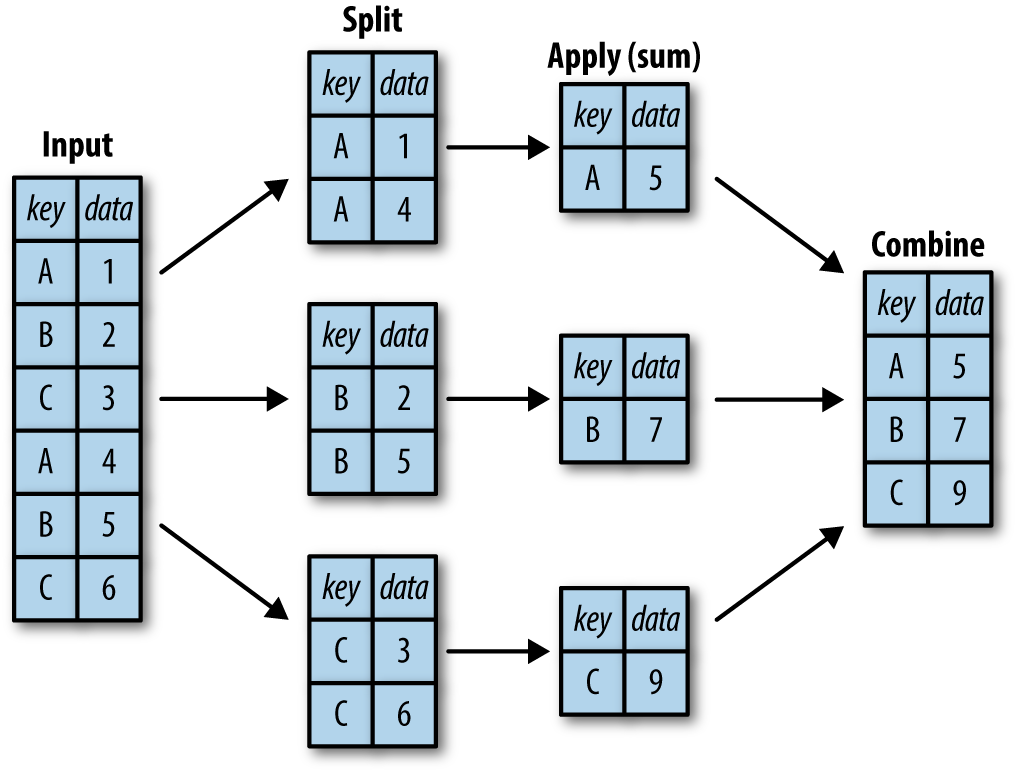

In [ ]:
data.groupby('director_name')

In [ ]:
data.groupby('director_name').ngroups

199

In [ ]:
data.groupby('director_name').groups

{'Adam McKay': [176, 323, 366, 505, 839, 916], 'Adam Shankman': [265, 300, 350, 404, 458, 843, 999, 1231], 'Alejandro González Iñárritu': [106, 749, 1015, 1034, 1077, 1405], 'Alex Proyas': [95, 159, 514, 671, 873], 'Alexander Payne': [793, 1006, 1101, 1211, 1281], 'Andrew Adamson': [11, 43, 328, 501, 947], 'Andrew Niccol': [533, 603, 701, 722, 1439], 'Andrzej Bartkowiak': [349, 549, 754, 911, 924], 'Andy Fickman': [517, 681, 909, 926, 973, 1023], 'Andy Tennant': [314, 320, 464, 593, 676, 885], 'Ang Lee': [99, 134, 748, 840, 1089, 1110, 1132, 1184], 'Anne Fletcher': [610, 650, 736, 789, 1206], 'Antoine Fuqua': [310, 338, 424, 467, 576, 808, 818, 1105], 'Atom Egoyan': [946, 1128, 1164, 1194, 1347, 1416], 'Barry Levinson': [313, 319, 471, 594, 878, 898, 1013, 1037, 1082, 1143, 1185, 1345, 1378], 'Barry Sonnenfeld': [13, 48, 90, 205, 591, 778, 783], 'Ben Stiller': [209, 212, 547, 562, 850], 'Bill Condon': [102, 307, 902, 1233, 1381], 'Bobby Farrelly': [352, 356, 481, 498, 624, 630, 654, 80

In [ ]:
data.groupby('director_name')

In [ ]:
data.groupby('director_name')['title']

In [ ]:
data.groupby('director_name')['title'].count()

director_name
Adam McKay                      6
Adam Shankman                   8
Alejandro González Iñárritu     6
Alex Proyas                     5
Alexander Payne                 5
                               ..
Wes Craven                     10
Wolfgang Petersen               7
Woody Allen                    18
Zack Snyder                     7
Zhang Yimou                     6
Name: title, Length: 199, dtype: int64

In [ ]:
data.groupby('director_name')['year'].agg(['min','max'])

,min,max
director_name,,
Adam McKay,2004,2015
Adam Shankman,2001,2012
Alejandro González Iñárritu,2000,2015
Alex Proyas,1994,2016
Alexander Payne,1999,2013
...,...,...
Wes Craven,1984,2011
Wolfgang Petersen,1981,2006
Woody Allen,1977,2013


In [ ]:
data_dir_agg = data.groupby('director_name')['year'].agg(['min','max']).reset_index()
data_dir_agg.columns = ['director_name', 'min_year', 'max_year']

data_dir_agg.head()

,director_name,min_year,max_year
0,Adam McKay,2004,2015
1,Adam Shankman,2001,2012
2,Alejandro González Iñárritu,2000,2015
3,Alex Proyas,1994,2016
4,Alexander Payne,1999,2013


In [ ]:
data.groupby(['director_name','year'])['year'].max()

director_name  year
Adam McKay     2004    2004
               2006    2006
               2008    2008
               2010    2010
               2013    2013
                       ... 
Zhang Yimou    2004    2004
               2006    2006
               2009    2009
               2011    2011
               2014    2014
Name: year, Length: 1398, dtype: int64

In [ ]:
data.groupby('director_name')[['title','year']].count()

,title,year
director_name,,
Adam McKay,6,6
Adam Shankman,8,8
Alejandro González Iñárritu,6,6
Alex Proyas,5,5
Alexander Payne,5,5
...,...,...
Wes Craven,10,10
Wolfgang Petersen,7,7
Woody Allen,18,18


In [ ]:
# data.groupby('emp_id')['mothly_ratings'].mean()
# data.groupby('emp_id').mean()

# Both mean the same thing, given there are only two cols in the dataframe.

In [ ]:
data.groupby('director_name').count()

,id,budget,popularity,revenue,title,vote_average,vote_count,year,month,day,gender,gender_map
director_name,,,,,,,,,,,,
Adam McKay,6,6,6,6,6,6,6,6,6,6,6,6
Adam Shankman,8,8,8,8,8,8,8,8,8,8,8,8
Alejandro González Iñárritu,6,6,6,6,6,6,6,6,6,6,6,6
Alex Proyas,5,5,5,5,5,5,5,5,5,5,5,5
Alexander Payne,5,5,5,5,5,5,5,5,5,5,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...
Wes Craven,10,10,10,10,10,10,10,10,10,10,10,10
Wolfgang Petersen,7,7,7,7,7,7,7,7,7,7,7,7
Woody Allen,18,18,18,18,18,18,18,18,18,18,18,18


In [ ]:
data.groupby('director_name').mean()

TypeError: Could not convert The Other GuysTalladega Nights: The Ballad of Ricky BobbyStep BrothersAnchorman 2: The Legend ContinuesThe Big ShortAnchorman: The Legend of Ron Burgundy to numeric

## Quiz

In [ ]:
data.groupby['year'] #error

TypeError: 'method' object is not subscriptable

In [ ]:
data.groupby('year').agg({'vote_average': ['mean', 'min', 'max']})

vote_average          
             mean  min  max
year                       
1976     7.633333  7.2  8.0
1977     6.900000  6.1  7.8
1978     7.020000  5.9  7.9
1979     7.025000  5.6  8.0
1980     7.187500  6.4  7.9
1981     6.927273  6.0  7.9
1982     6.810000  5.5  7.9
1983     6.666667  4.5  8.0
1984     6.760000  6.1  7.3
1985     6.885714  5.9  8.0
1986     6.809091  5.8  7.8
1987     6.991667  6.1  7.6
1988     6.692308  5.7  7.6
1989     6.750000  5.5  7.6
1990     6.661111  5.8  8.2
1991     7.100000  6.6  8.1
1992     6.640909  5.7  8.0
1993     7.144444  6.1  8.3
1994     6.596774  5.0  8.3
1995     6.509091  4.5  8.1
1996     6.384783  5.4  7.8
1997     6.552174  4.1  7.9
1998     6.442222  4.9  7.9
1999     6.384375  5.1  8.3
2000     6.347458  4.4  8.1
2001     6.217742  3.7  8.0
2002     6.359420  3.4  8.0
2003     6.115517  4.4  8.1
2004     6.427869  4.7  7.7
2005     6.229577  3.1  7.7
2006     6.212329  3.6  8.0
2007     6.307407  3.2  7.9
2008     6.268657  3.0  8.2
2009     6.190909  3.9  7.9
2010     6.223810  4.2  8.1
2011     6.098507  4.1  7.7
2012     6.216327  4.9  7.8
2013     6.315789  3.3  7.9
2014     6.313208  4.1  8.1
2015     6.141463  3.9  7.7
2016     5.915385  4.5  7.1

In [ ]:
data.groupby('year').agg(('vote_average': ['mean', 'min', 'max']))

SyntaxError: invalid syntax (<ipython-input-85-07d7624a6211>, line 1)

## Group based Filtering

In [ ]:
# How to find the details of the movies by high budget directors?

In [ ]:
data_dir_budget = data.groupby("director_name")["budget"].max().reset_index()
data_dir_budget.head()

,director_name,budget
0,Adam McKay,100000000
1,Adam Shankman,80000000
2,Alejandro González Iñárritu,135000000
3,Alex Proyas,140000000
4,Alexander Payne,30000000


In [ ]:
names = data_dir_budget.loc[data_dir_budget["budget"] >= 100, "director_name"]

In [ ]:
data_dir_budget.iloc[data_dir_budget["budget"] >= 100] # not supported for iloc

NotImplementedError: iLocation based boolean indexing on an integer type is not available

In [ ]:
data.loc[data['director_name'].isin(names)]

,id,budget,popularity,revenue,title,vote_average,vote_count,year,month,day,director_name,gender,gender_map
0,43597,237000000,150,2787965087,Avatar,7.2,11800,2009,Dec,Thursday,James Cameron,Male,0
1,43598,300000000,139,961000000,Pirates of the Caribbean: At World's End,6.9,4500,2007,May,Saturday,Gore Verbinski,Male,0
2,43599,245000000,107,880674609,Spectre,6.3,4466,2015,Oct,Monday,Sam Mendes,Male,0
3,43600,250000000,112,1084939099,The Dark Knight Rises,7.6,9106,2012,Jul,Monday,Christopher Nolan,Male,0
4,43602,258000000,115,890871626,Spider-Man 3,5.9,3576,2007,May,Tuesday,Sam Raimi,Male,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,48363,0,3,321952,The Last Waltz,7.9,64,1978,May,Monday,Martin Scorsese,Male,0
1461,48370,27000,19,3151130,Clerks,7.4,755,1994,Sep,Tuesday,Kevin Smith,Male,0
1462,48375,0,7,0,Rampage,6.0,131,2009,Aug,Friday,Uwe Boll,Male,0
1463,48376,0,3,0,Slacker,6.4,77,1990,Jul,Friday,Richard Linklater,Male,0


## using lambda function

In [ ]:
data.groupby('director_name').filter(lambda x: x["budget"].max() >= 100)

,id,budget,popularity,revenue,title,vote_average,vote_count,year,month,day,director_name,gender,gender_map
0,43597,237000000,150,2787965087,Avatar,7.2,11800,2009,Dec,Thursday,James Cameron,Male,0
1,43598,300000000,139,961000000,Pirates of the Caribbean: At World's End,6.9,4500,2007,May,Saturday,Gore Verbinski,Male,0
2,43599,245000000,107,880674609,Spectre,6.3,4466,2015,Oct,Monday,Sam Mendes,Male,0
3,43600,250000000,112,1084939099,The Dark Knight Rises,7.6,9106,2012,Jul,Monday,Christopher Nolan,Male,0
4,43602,258000000,115,890871626,Spider-Man 3,5.9,3576,2007,May,Tuesday,Sam Raimi,Male,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,48363,0,3,321952,The Last Waltz,7.9,64,1978,May,Monday,Martin Scorsese,Male,0
1461,48370,27000,19,3151130,Clerks,7.4,755,1994,Sep,Tuesday,Kevin Smith,Male,0
1462,48375,0,7,0,Rampage,6.0,131,2009,Aug,Friday,Uwe Boll,Male,0
1463,48376,0,3,0,Slacker,6.4,77,1990,Jul,Friday,Richard Linklater,Male,0


In [ ]:
# Group Based Filtering. groupby + filter

## Group based Apply

In [ ]:
def func(x):
  # returns whether a movie is risky or not
  x["risky"] = (x["budget"] - x["revenue"].mean()) >= 0
  return x

In [ ]:
data_risky = data.groupby("director_name", group_keys=False).apply(func)
data_risky

,id,budget,popularity,revenue,title,vote_average,vote_count,year,month,day,director_name,gender,gender_map,risky
0,43597,237000000,150,2787965087,Avatar,7.2,11800,2009,Dec,Thursday,James Cameron,Male,0,False
1,43598,300000000,139,961000000,Pirates of the Caribbean: At World's End,6.9,4500,2007,May,Saturday,Gore Verbinski,Male,0,False
2,43599,245000000,107,880674609,Spectre,6.3,4466,2015,Oct,Monday,Sam Mendes,Male,0,False
3,43600,250000000,112,1084939099,The Dark Knight Rises,7.6,9106,2012,Jul,Monday,Christopher Nolan,Male,0,False
4,43602,258000000,115,890871626,Spider-Man 3,5.9,3576,2007,May,Tuesday,Sam Raimi,Male,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,48363,0,3,321952,The Last Waltz,7.9,64,1978,May,Monday,Martin Scorsese,Male,0,False
1461,48370,27000,19,3151130,Clerks,7.4,755,1994,Sep,Tuesday,Kevin Smith,Male,0,False
1462,48375,0,7,0,Rampage,6.0,131,2009,Aug,Friday,Uwe Boll,Male,0,False
1463,48376,0,3,0,Slacker,6.4,77,1990,Jul,Friday,Richard Linklater,Male,0,False


In [ ]:
data_risky.loc[data_risky["risky"]]

,id,budget,popularity,revenue,title,vote_average,vote_count,year,month,day,director_name,gender,gender_map,risky
7,43608,200000000,107,586090727,Quantum of Solace,6.1,2965,2008,Oct,Thursday,Marc Forster,Male,0,True
12,43614,380000000,135,1045713802,Pirates of the Caribbean: On Stranger Tides,6.4,4948,2011,May,Saturday,Rob Marshall,Male,0,True
15,43618,200000000,37,310669540,Robin Hood,6.2,1398,2010,May,Wednesday,Ridley Scott,Male,0,True
20,43624,209000000,64,303025485,Battleship,5.5,2114,2012,Apr,Wednesday,Peter Berg,Male,0,True
24,43630,210000000,3,459359555,X-Men: The Last Stand,6.3,3525,2006,May,Wednesday,Brett Ratner,Male,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1347,47224,5000000,7,3263585,The Sweet Hereafter,6.8,103,1997,May,Wednesday,Atom Egoyan,Male,0,True
1349,47229,5000000,3,4842699,90 Minutes in Heaven,5.4,40,2015,Sep,Friday,Michael Polish,Male,0,True
1351,47233,5000000,6,0,Light Sleeper,5.7,15,1992,Aug,Friday,Paul Schrader,NaN,1,True
1356,47263,15000000,10,0,Dying of the Light,4.5,118,2014,Dec,Thursday,Paul Schrader,NaN,1,True


## Quiz:
Given a dataframe of student records (roll_id, subject, marks) of shape (100, 3). There are total 5 subjects. We wanted to find subject-wise average marks so we used the following code.

In [ ]:
def mark_mean(x):
  x['marks_mean']=x['marks'].mean()
  return x


data.loc[['subject','marks']].groupby('subject').apply(mark_mean)`